In [29]:
import pandas as pd
import io
from keras import models
from keras import layers
from keras import regularizers
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras import regularizers
NB_WORDS = 10000  # Parameter indicating the number of words we'll put in the dictionary
NB_START_EPOCHS = 20  # Number of epochs we usually start to train with
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent
MAX_LEN = 20  # Maximum number of words in a sequence


In [8]:
from google.colab import files
uploaded = files.upload()

Saving housepricedata.csv to housepricedata.csv


In [10]:
df = pd.read_csv('housepricedata.csv')

In [11]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [12]:
dataset = df.values

In [13]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [14]:
X = dataset[:,0:10]

In [15]:
Y = dataset[:,10]

In [16]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [17]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [18]:
#split the train and test data
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [19]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [20]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [21]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [22]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 9ms/step - loss: 0.0000e+00 - accuracy: 0.5093 - val_loss: 0.0000e+00 - val_accuracy: 0.4795
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5215 - val_loss: 0.0000e+00 - val_accuracy: 0.4795
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5191 - val_loss: 0.0000e+00 - val_accuracy: 0.4795
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.4909 - val_loss: 0.0000e+00 - val_accuracy: 0.4795
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4872 - val_loss: 0.0000e+00 - val_accuracy: 0.4795
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5303 - val_loss: 0.0000e+00 - val_accuracy: 0.4795
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5056 - v

In [ ]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.3048 - accuracy: 0.8676


0.8675799369812012

**Visualizing loss and accuracy**

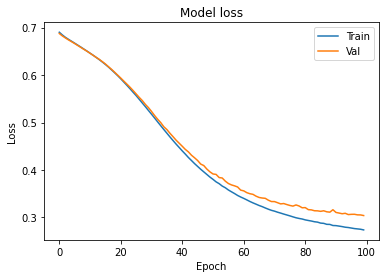

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

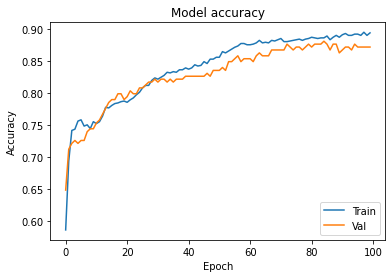

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

**Adding regularization to our network**

In [ ]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [ ]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0314 - accuracy: 0.9863 - val_loss: 1.0823 - val_accuracy: 0.8676
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0349 - accuracy: 0.9853 - val_loss: 1.2124 - val_accuracy: 0.8447
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0247 - accuracy: 0.9892 - val_loss: 1.2673 - val_accuracy: 0.8630
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0301 - accuracy: 0.9843 - val_loss: 1.2497 - val_accuracy: 0.8539
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0295 - accuracy: 0.9883 - val_loss: 1.4077 - val_accuracy: 0.8539
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0326 - accuracy: 0.9843 - val_loss: 1.2984 - val_accuracy: 0.8676
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0414 - accuracy: 0.9814 - val_loss: 1.2223 - val_accuracy: 0.8493
Epoch 8/100
3

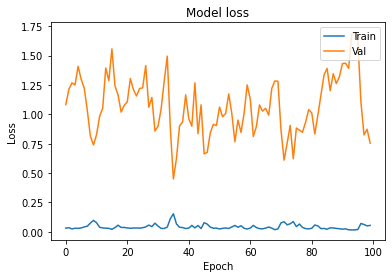

In [ ]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

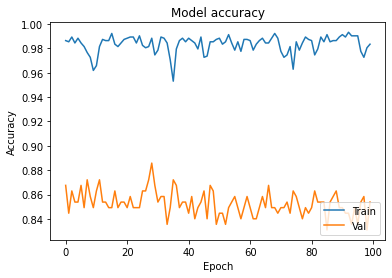

In [ ]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [ ]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 10ms/step - loss: 21.0790 - accuracy: 0.5512 - val_loss: 3.8606 - val_accuracy: 0.8037
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 2.4457 - accuracy: 0.8468 - val_loss: 0.6638 - val_accuracy: 0.8630
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5912 - accuracy: 0.8771 - val_loss: 0.5236 - val_accuracy: 0.8539
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5096 - accuracy: 0.8804 - val_loss: 0.5107 - val_accuracy: 0.8493
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5024 - accuracy: 0.8669 - val_loss: 0.5257 - val_accuracy: 0.8493
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.4680 - accuracy: 0.8798 - val_loss: 0.4932 - val_accuracy: 0.8539
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.4911 - accuracy: 0.8773 - val_loss: 0.4720 - val_accuracy: 0.8721
Epoch 8/100

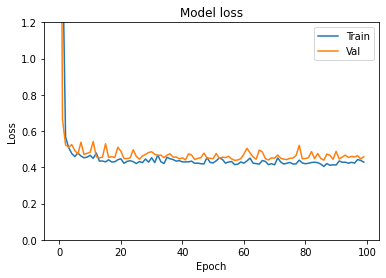

In [ ]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

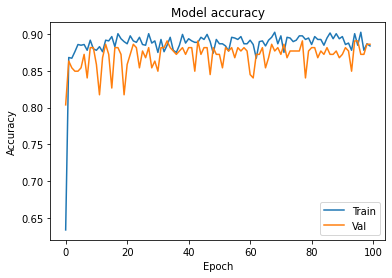

In [ ]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


Would love to come back to this post and read it again! 
Link: https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4

In [30]:
#we can tweek this code using regression loss algos
def deep_model(model, X_train, y_train, X_valid, y_valid):  
  model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
    
  history = model.fit(X_train
                       , y_train
                       , epochs=NB_START_EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=0)
  return history

In [31]:
'''
    Function to evaluate a trained model on a chosen metric. 
    Training and validation metric are plotted in a
    line chart for each epoch.
    
    Parameters:
        history : model training history
        metric_name : loss or accuracy
    Output:
        line chart with epochs of x-axis and metric on
        y-axis
    '''
def eval_metric(model, history, metric_name):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]
    e = range(1, NB_START_EPOCHS + 1)
    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.xlabel('Epoch number')
    plt.ylabel(metric_name)
    plt.title('Comparing training and validation ' + metric_name + ' for ' + model.name)
    plt.legend()
    plt.show()

In [32]:
'''
    Function to test the model on new data after training it
    on the full training data with the optimal number of epochs.
    
    Parameters:
        model : trained model
        X_train : training features
        y_train : training target
        X_test : test features
        y_test : test target
        epochs : optimal number of epochs
    Output:
        test accuracy and test loss
    '''
def test_model(model, X_train, y_train, X_test, y_test, epoch_stop):
  model.fit(X_train
              , y_train
              , epochs=epoch_stop
              , batch_size=BATCH_SIZE
              , verbose=0)
  results = model.evaluate(X_test, y_test)
  print()
  print('Test accuracy: {0:.2f}%'.format(results[1]*100))
  return results

In [33]:
def compare_models_by_metric(model_1, model_2, model_hist_1, model_hist_2, metric):
    '''
    Function to compare a metric between two models 
    
    Parameters:
        model_hist_1 : training history of model 1
        model_hist_2 : training history of model 2
        metrix : metric to compare, loss, acc, val_loss or val_acc
        
    Output:
        plot of metrics of both models
    '''
    metric_model_1 = model_hist_1.history[metric]
    metric_model_2 = model_hist_2.history[metric]
    e = range(1, NB_START_EPOCHS + 1)
    
    metrics_dict = {
        'acc' : 'Training Accuracy',
        'loss' : 'Training Loss',
        'val_acc' : 'Validation accuracy',
        'val_loss' : 'Validation loss'
    }
    
    metric_label = metrics_dict[metric]
    plt.plot(e, metric_model_1, 'bo', label=model_1.name)
    plt.plot(e, metric_model_2, 'b', label=model_2.name)
    plt.xlabel('Epoch number')
    plt.ylabel(metric_label)
    plt.title('Comparing ' + metric_label + ' between models')
    plt.legend()
    plt.show()

In [34]:
def optimal_epoch(model_hist):
    '''
    Function to return the epoch number where the validation loss is
    at its minimum
    
    Parameters:
        model_hist : training history of model
    Output:
        epoch number with minimum validation loss
    '''
    min_epoch = np.argmin(model_hist.history['val_loss']) + 1
    print("Minimum validation loss reached in epoch {}".format(min_epoch))
    return min_epoch

In [35]:
base_model = models.Sequential()
base_model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
base_model.add(layers.Dense(64, activation='relu'))
base_model.add(layers.Dense(3, activation='softmax'))
base_model.nam = 'Baseline model'